## About

[Stacked area chart](/stacked-area-plot) is a graphical representation of data that shows the composition of a variable over time. The area between the x-axis and the lines is **filled** with colors to represent **different categories** of data.

The following example shows the **evolution of natural disasters** over the years by type of disaster.

This chart has been created by [Joseph Barbier](https://barbierjoseph.com). Thanks to him for accepting sharing its work here!

As a teaser, here is the plot we’re gonna try building:

![stacked area chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-stacked-area-with-inflexion-arrows.png?raw=true)


## Libraries

First, we need to install the following libraries:

- [matplotlib](/matplotlib): for plot customization
- [seaborn](/seaborn): for creating the plot
- [pandas](/pandas): for data manipulation
- [highlight_text](/advanced-custom-annotations-matplotlib): for annotations
- [pypalettes](/color-palette-finder): for the colors of the plot


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pypalettes import get_hex
from highlight_text import fig_text, ax_text

## Dataset

The type of data needed when creating a [stacked area chart](/stacked-area-plot) is a **time series**.

Specifically, our dataset needs a column for the **time variable** (usually the x-axis) and a column for each **category** we want to represent (usually the y-axis). In this case, we have one column per disaster type.


In [3]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/disaster-events.csv'
df = pd.read_csv(url)

def remove_agg_rows(entity: str):
   if entity.lower().startswith('all disasters'):
      return False
   else:
      return True
df = df.replace('Dry mass movement', 'Drought')
df = df[df['Entity'].apply(remove_agg_rows)]
df = df[~df['Entity'].isin(['Fog', 'Glacial lake outburst flood'])]
df = df.pivot_table(index='Entity', columns='Year', values='Disasters').T
df.loc[1900, :] = df.loc[1900, :].fillna(0)
df = df[df.index >= 1960]
df = df[df.index <= 2023]
df = df.interpolate(axis=1)
df.head()

Entity,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Volcanic activity,Wet mass movement,Wildfire
Year,,,,,,,,
1960,1.0,8.0,14.0,20.0,8.0,1.0,2.0,2.0
1961,1.0,3.0,1.0,14.0,9.0,5.5,2.0,2.0
1962,1.0,4.0,1.0,13.0,8.0,5.0,2.0,2.0
1963,1.0,3.0,2.0,21.0,8.0,3.0,2.0,2.0
1964,8.0,7.0,14.5,22.0,22.0,1.0,1.0,1.0


## Simple stacked area

This first version of the plot is made via the `ax.stackplot()` function from [matplotlib](/matplotlib). It is the **simplest way** to create a [stacked area chart](/stacked-area-plot)


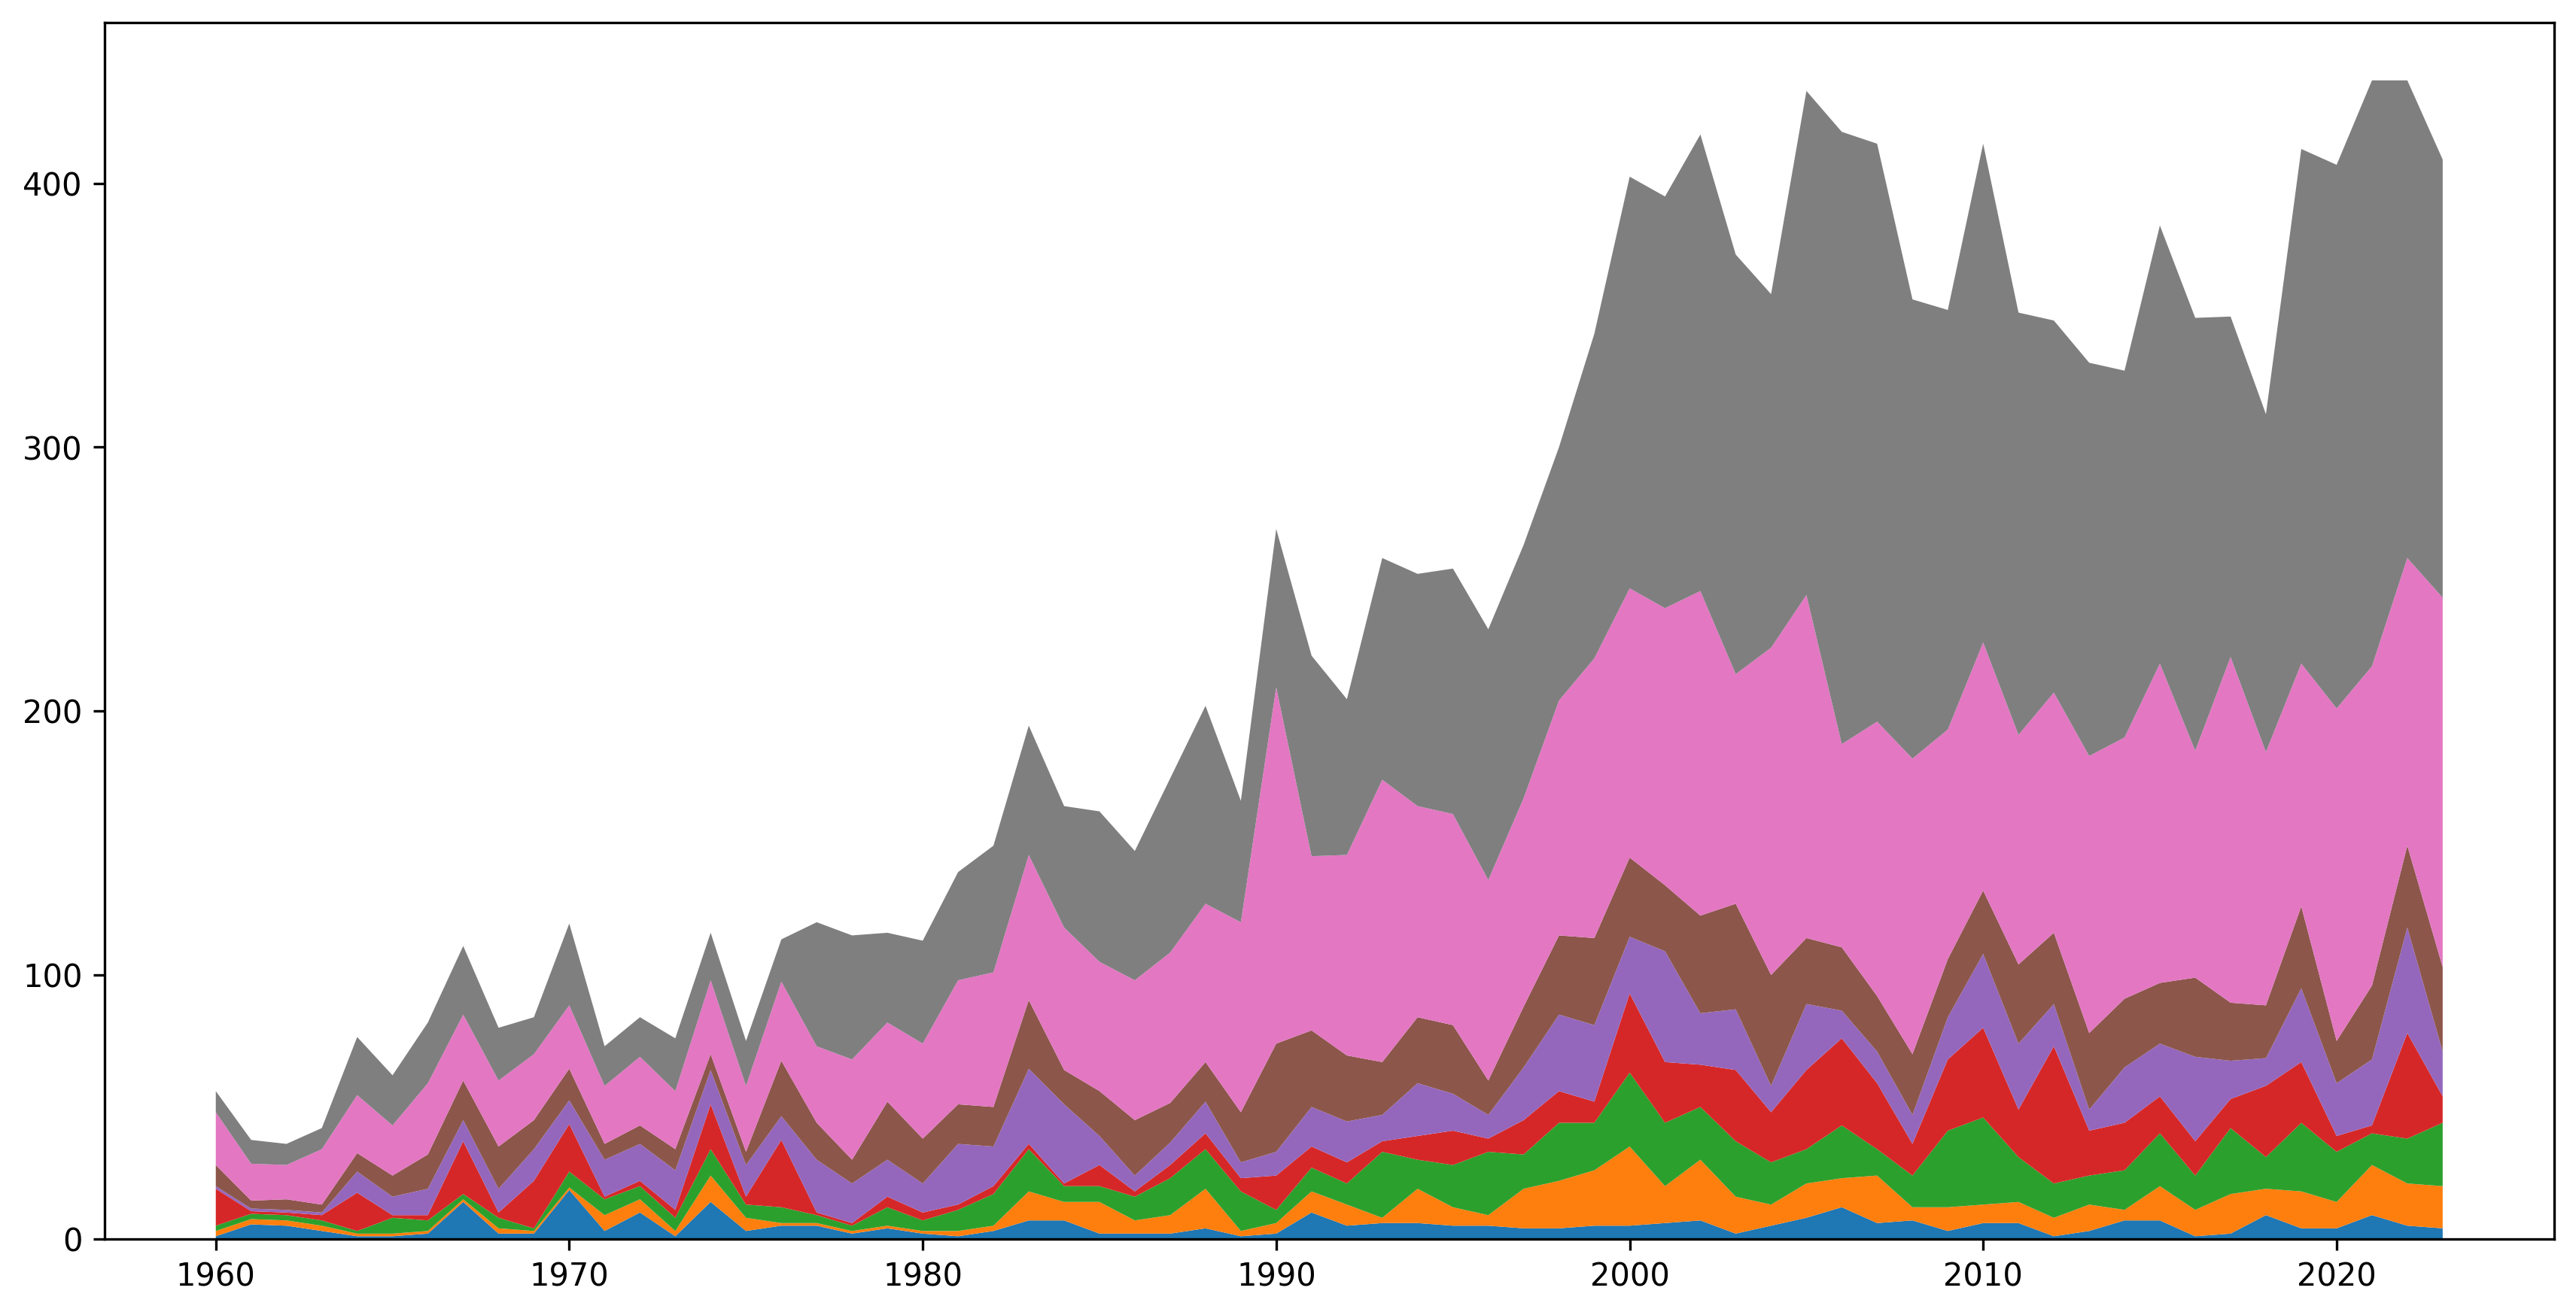

In [8]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)

# display the plot
plt.show()

## Custom axes

Since default axes are not very attractive, we start by **removing them** with the `ax.set_axis_off()` function.

The x and y labels will be displayed using the [highlight_text](/advanced-custom-annotations-matplotlib) package, which **simplifies** the process of adding text annotations to a plot.

In practice, we use `for` loops to **add the labels** to the plot with the desired values.


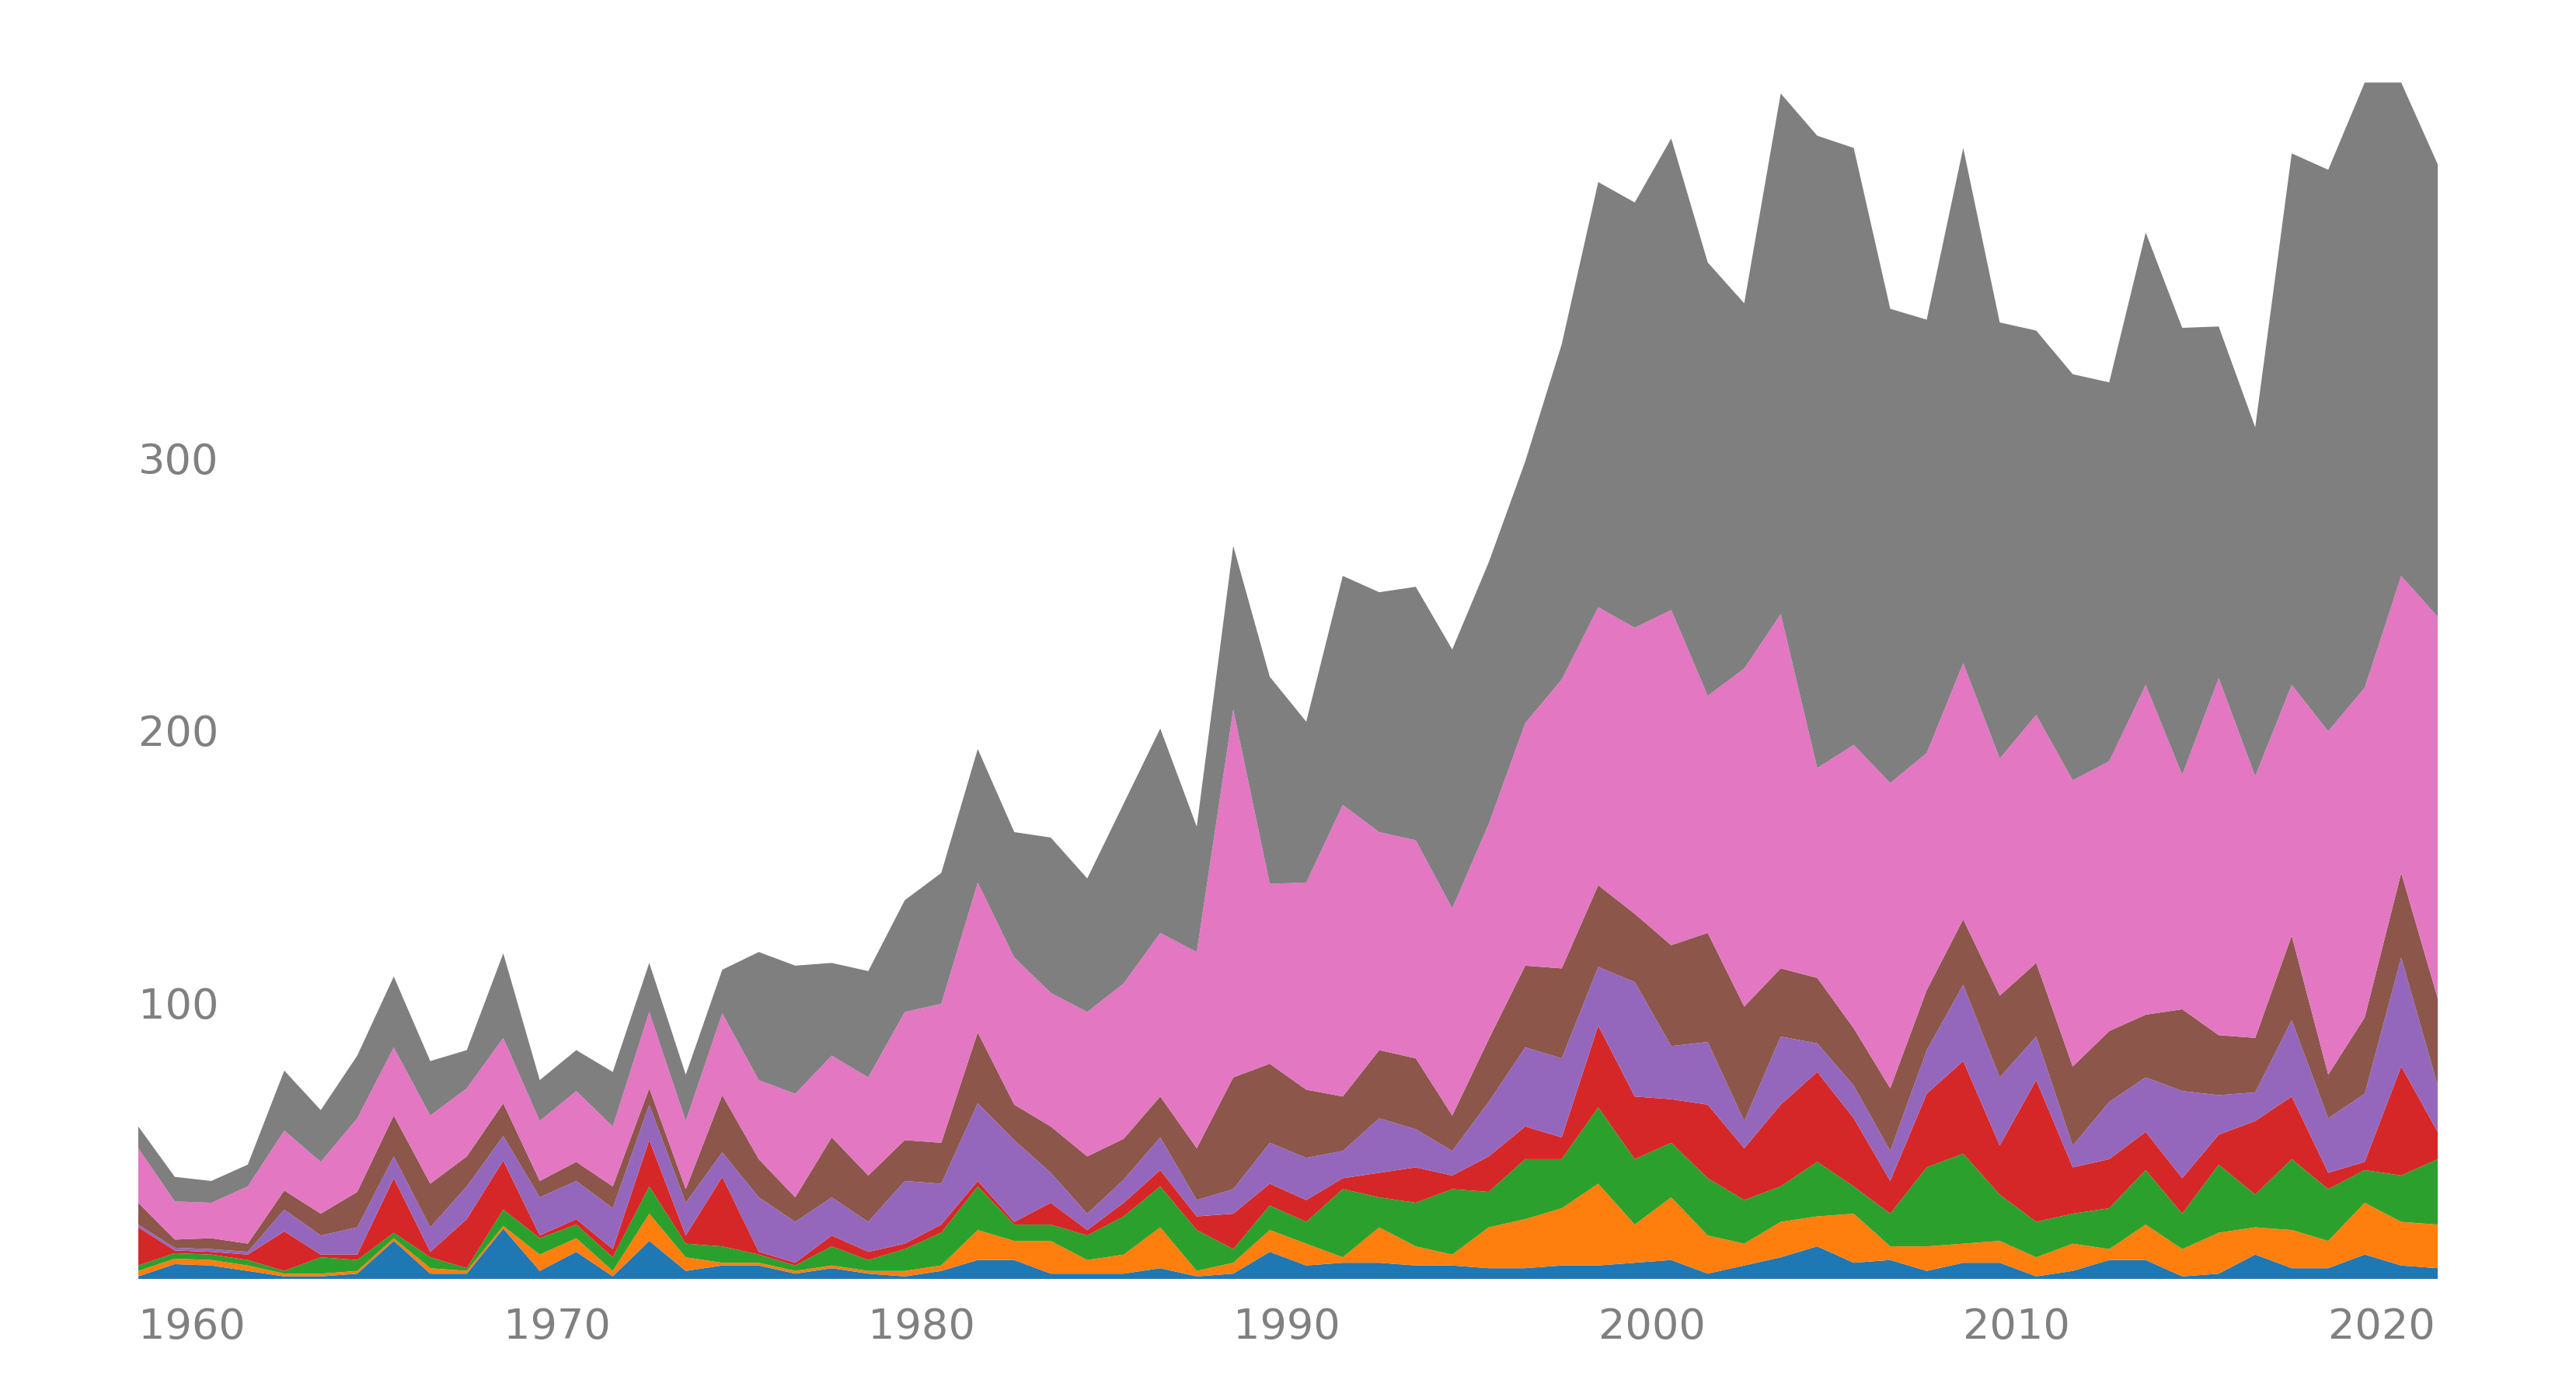

In [7]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13,
      color='grey'
   )

# display the plot
plt.show()

## Custom the colors

The palette used is from the [pypalettes]() library. We use its `get_hex()` function to get a list of colors (in hexadecimal format) that we will use to fill the areas.

We add an additional step to manually define a **mapping between colors and the columns**. For example, we want natural disasters related to **floods to be blue**, and those about **volcanoes to be red**, etc. _Unfortunately_, there is no magic way to do this other than manually defining a **dictionary** (named `color_mapping` in this case).

Then, we simply specify the `colors` parameter of the `ax.stackplot()` function with the list of colors we want to use.


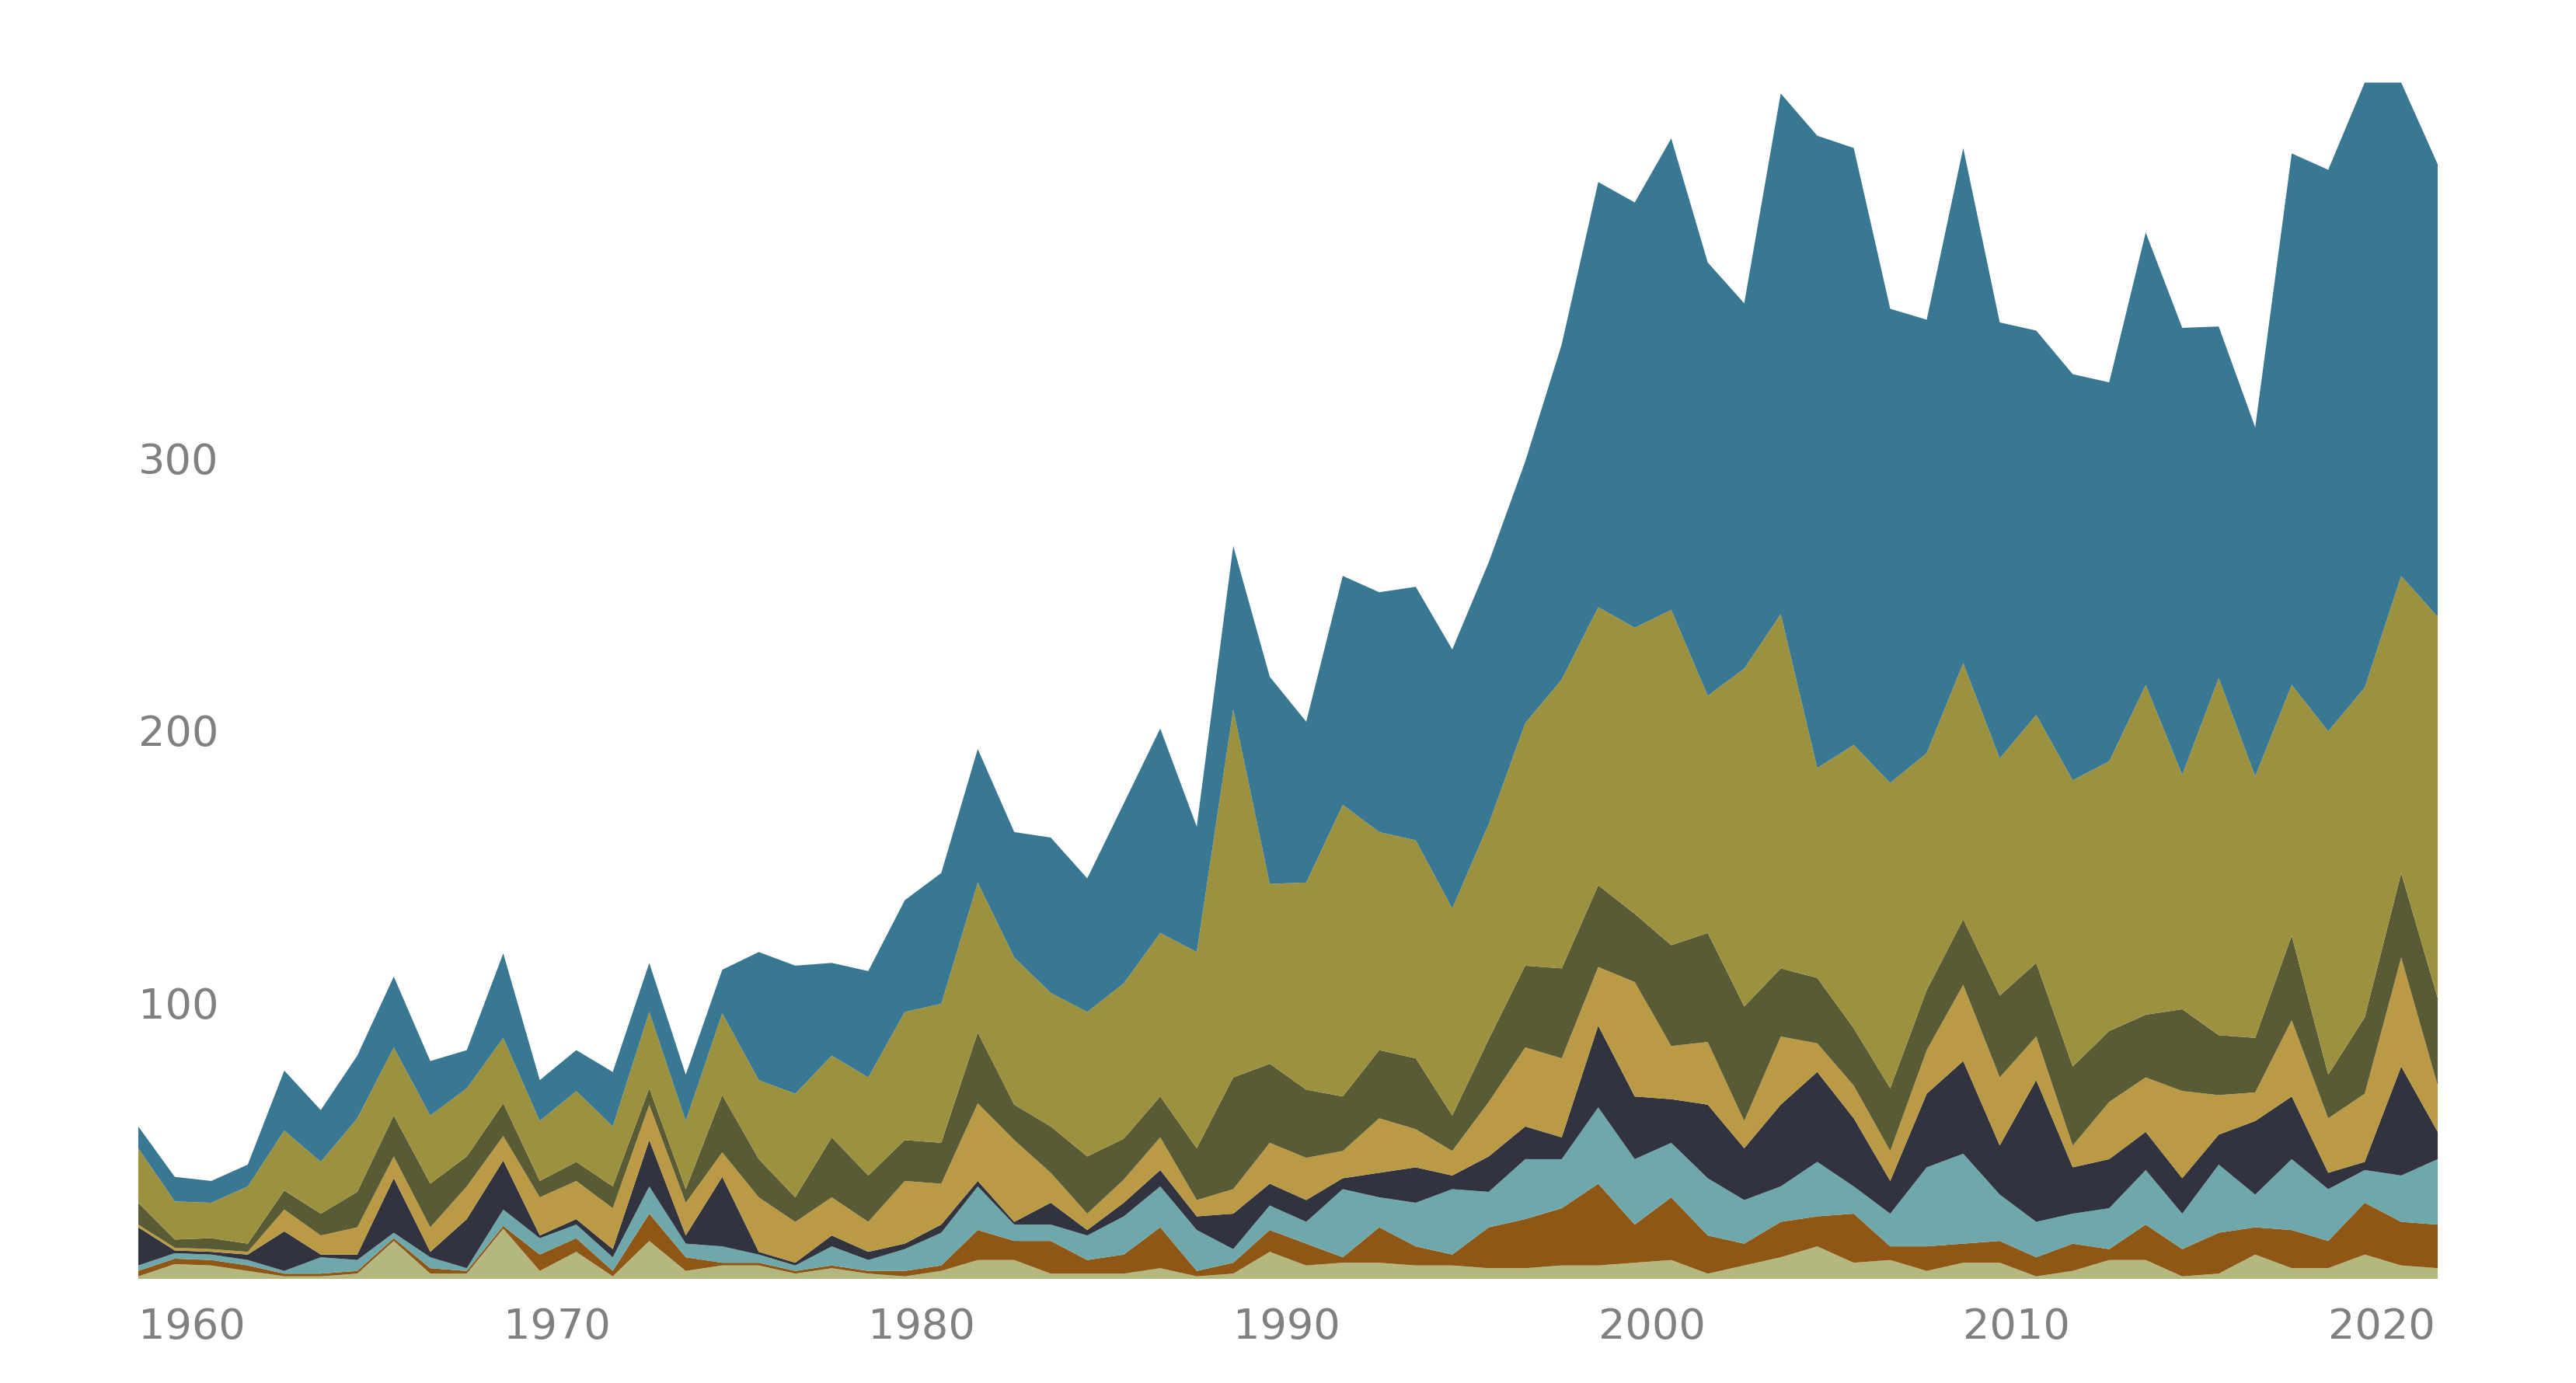

In [9]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13,
      color='grey'
   )

# display the plot
plt.show()

## Add title and source with custom fonts

The next step is to **add a title and a source** to the plot. We use the [highlight_text](/advanced-custom-annotations-matplotlib) package to achieve this because it allows for different **text styling within the same string**.

However, before doing this, we [load 2 custom fonts](/custom-fonts-in-matplotlib) to ensure a **better-looking title and source**. This is done using the `mpl.font_manager.FontProperties` class.

Finally, we use the `fig_text()` function from the [highlight_text](/advanced-custom-annotations-matplotlib) package to add the **title and source** to the plot.


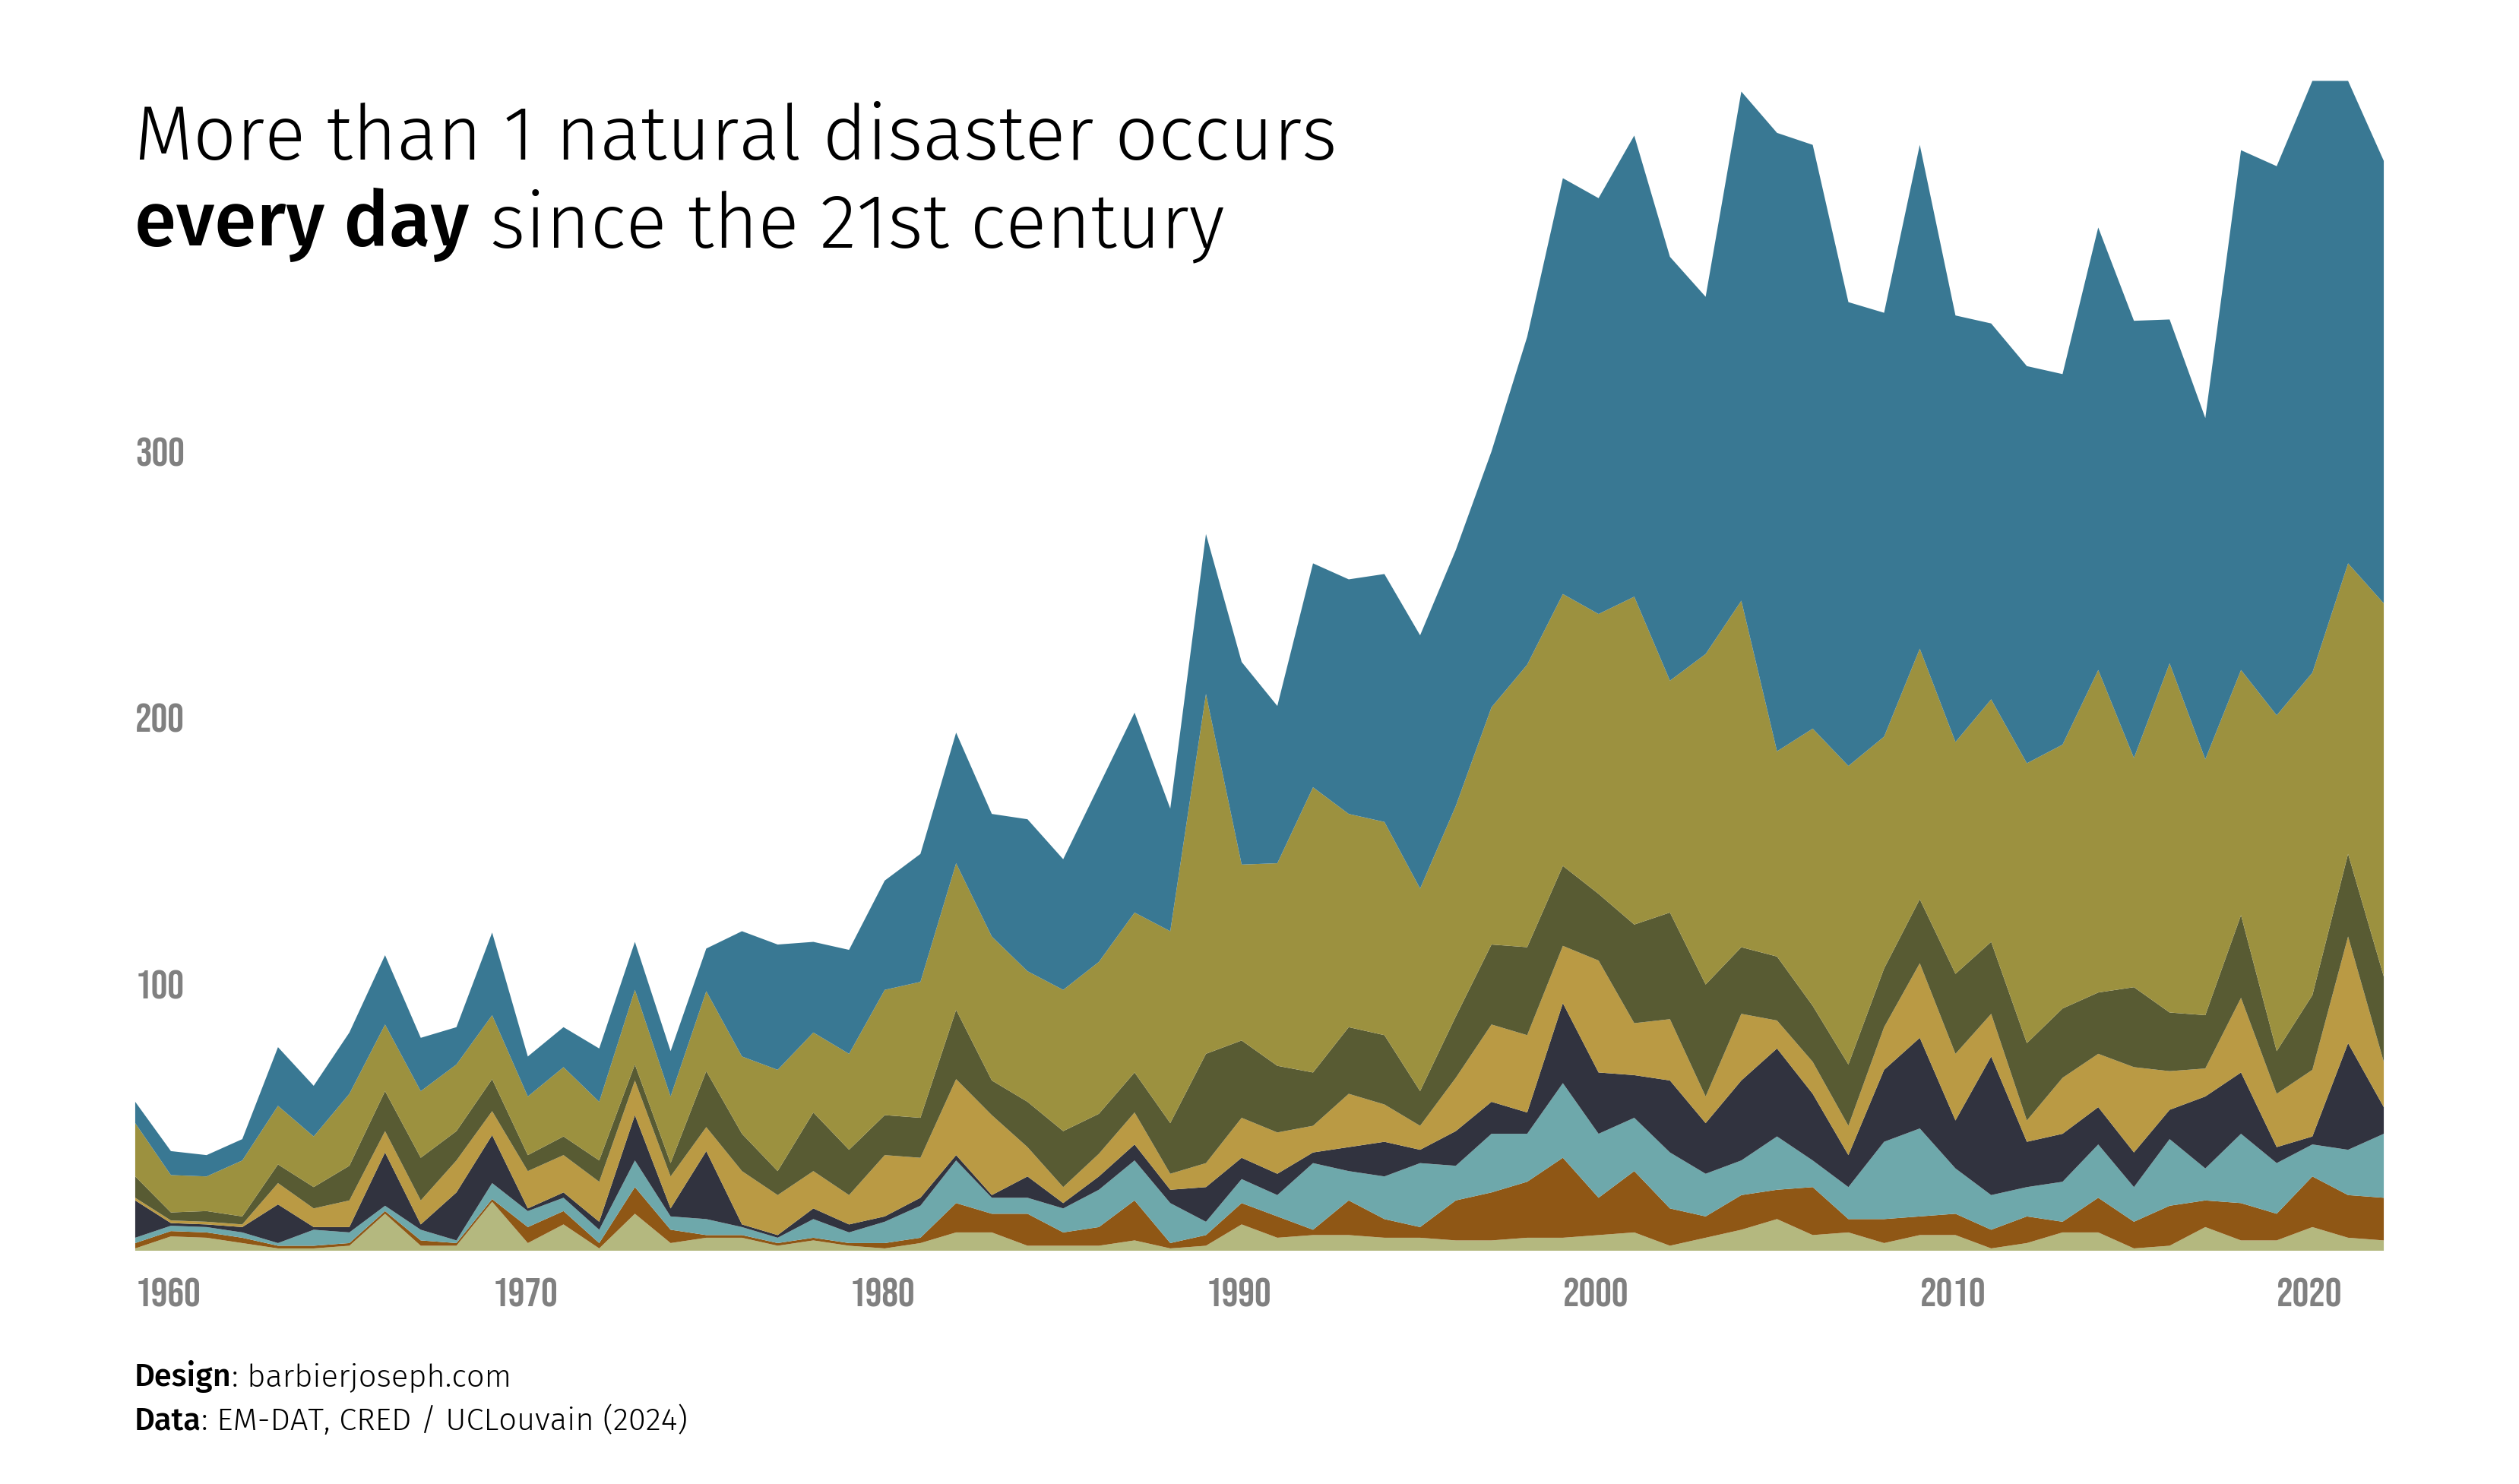

In [15]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24,
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)

# display the plot
plt.show()

## Reference lines and inline labels

Instead of using the **default matplotlib legend** (called with `ax.legend()`), we add **inline labels** to the right of the chart that have the same colors as the areas. We use the [highlight_text](/advanced-custom-annotations-matplotlib) package to achieve this.

As before, finding the **position of the labels** requires **trial and error**.


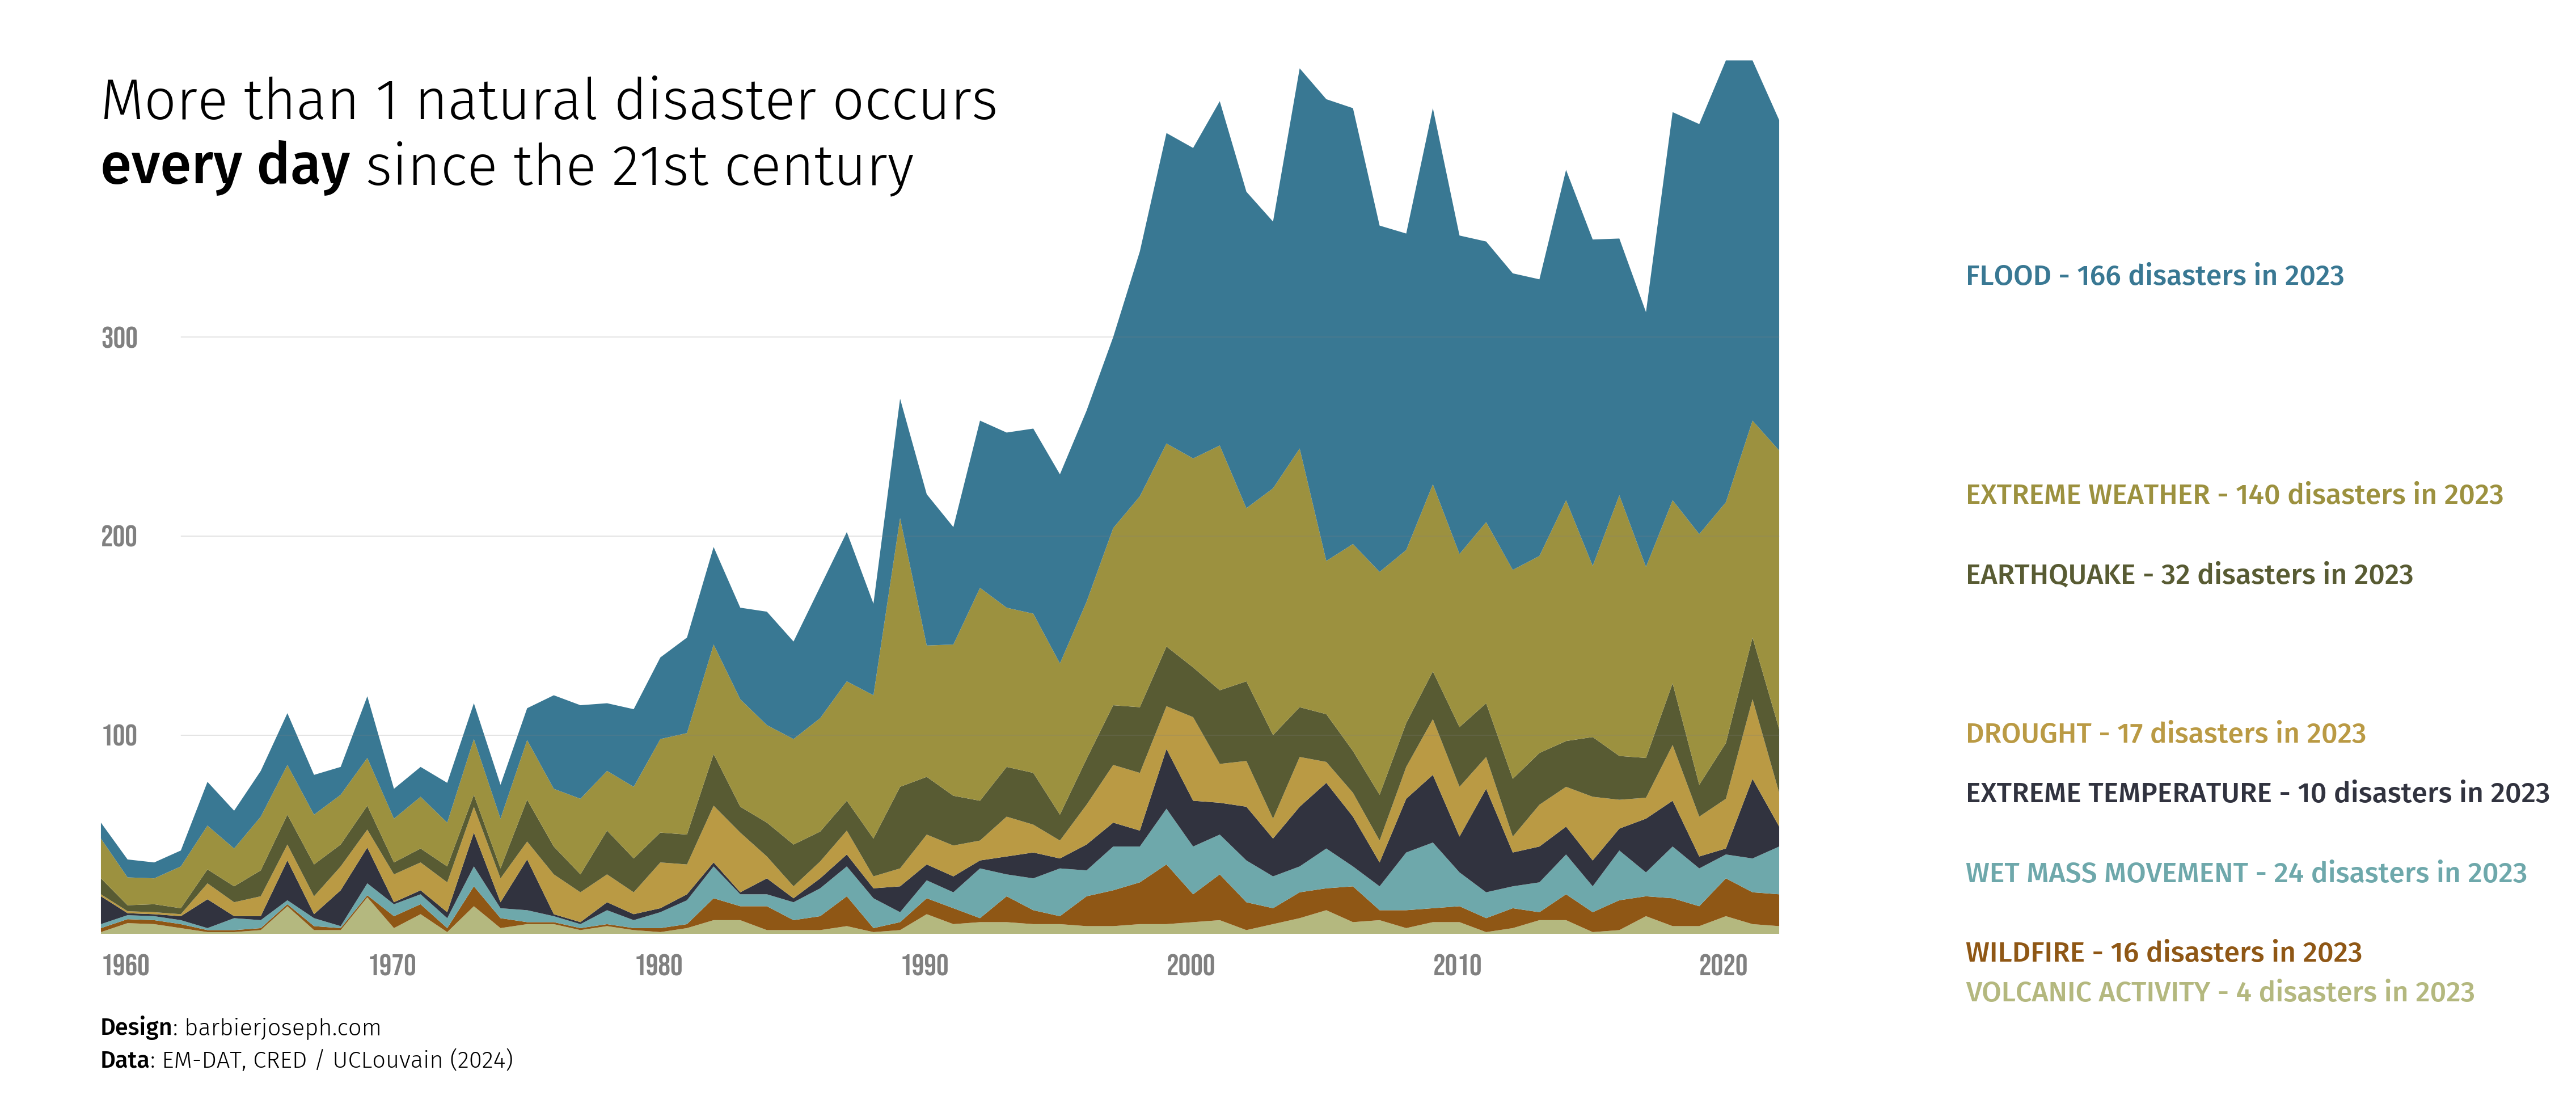

In [14]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )
   ax.plot([1963, 2023], [value, value], color='grey', lw=.1)

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24,
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)

# add inline labels
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
   country = columns[::-1][i]
   val_2023 = int(df.loc[2023, country])
   ax_text(
      x=2030, y=y_pos[i], s=f"{country.upper()} - {val_2023} disasters in 2023",
      va='center', ha='left',
      font=other_bold_font, fontsize=12,
      color=colors[7-i]
   )

# display the plot
plt.show()

## Arrows with inflexion points

And finally, we add **arrows to the plot** that point to the **inflexion points**. This method effectively highlights **which areas** correspond to **which disasters**.

For more detailed guidance, refer to the [dedicated post in the gallery](/591-arrows-with-inflexion-point) on working with **arrows with inflexion points**—a recommended read if you're unfamiliar with this technique.

To begin, we define an `arrow_inflexion()` function, which will make our **code easier to read**.


In [18]:
def arrow_inflexion(
   ax,
   start, end,
   angleA, angleB,
   radius=0,
   color="black",
   transform=None
):

   # get the coordinates
   x1, y1 = end
   x2, y2 = start

   # avoid division by zero
   epsilon = 1e-6
   if x2 == x1:
      x2 += epsilon
   if y2 == y1:
      y2 += epsilon

   # select right coordinates
   if transform is None:
      transform = ax.transData

   # add the arrow
   connectionstyle = f"angle,angleA={angleA},angleB={angleB},rad={radius}"
   ax.annotate(
      "",
      xy=(x1, y1), xycoords=transform,
      xytext=(x2, y2), textcoords=transform,
      arrowprops=dict(
         color=color, arrowstyle="->",
         shrinkA=5, shrinkB=5,
         patchA=None, patchB=None,
         connectionstyle=connectionstyle,
      ),
   )

Now we can just re-use our code from before but with our new function:


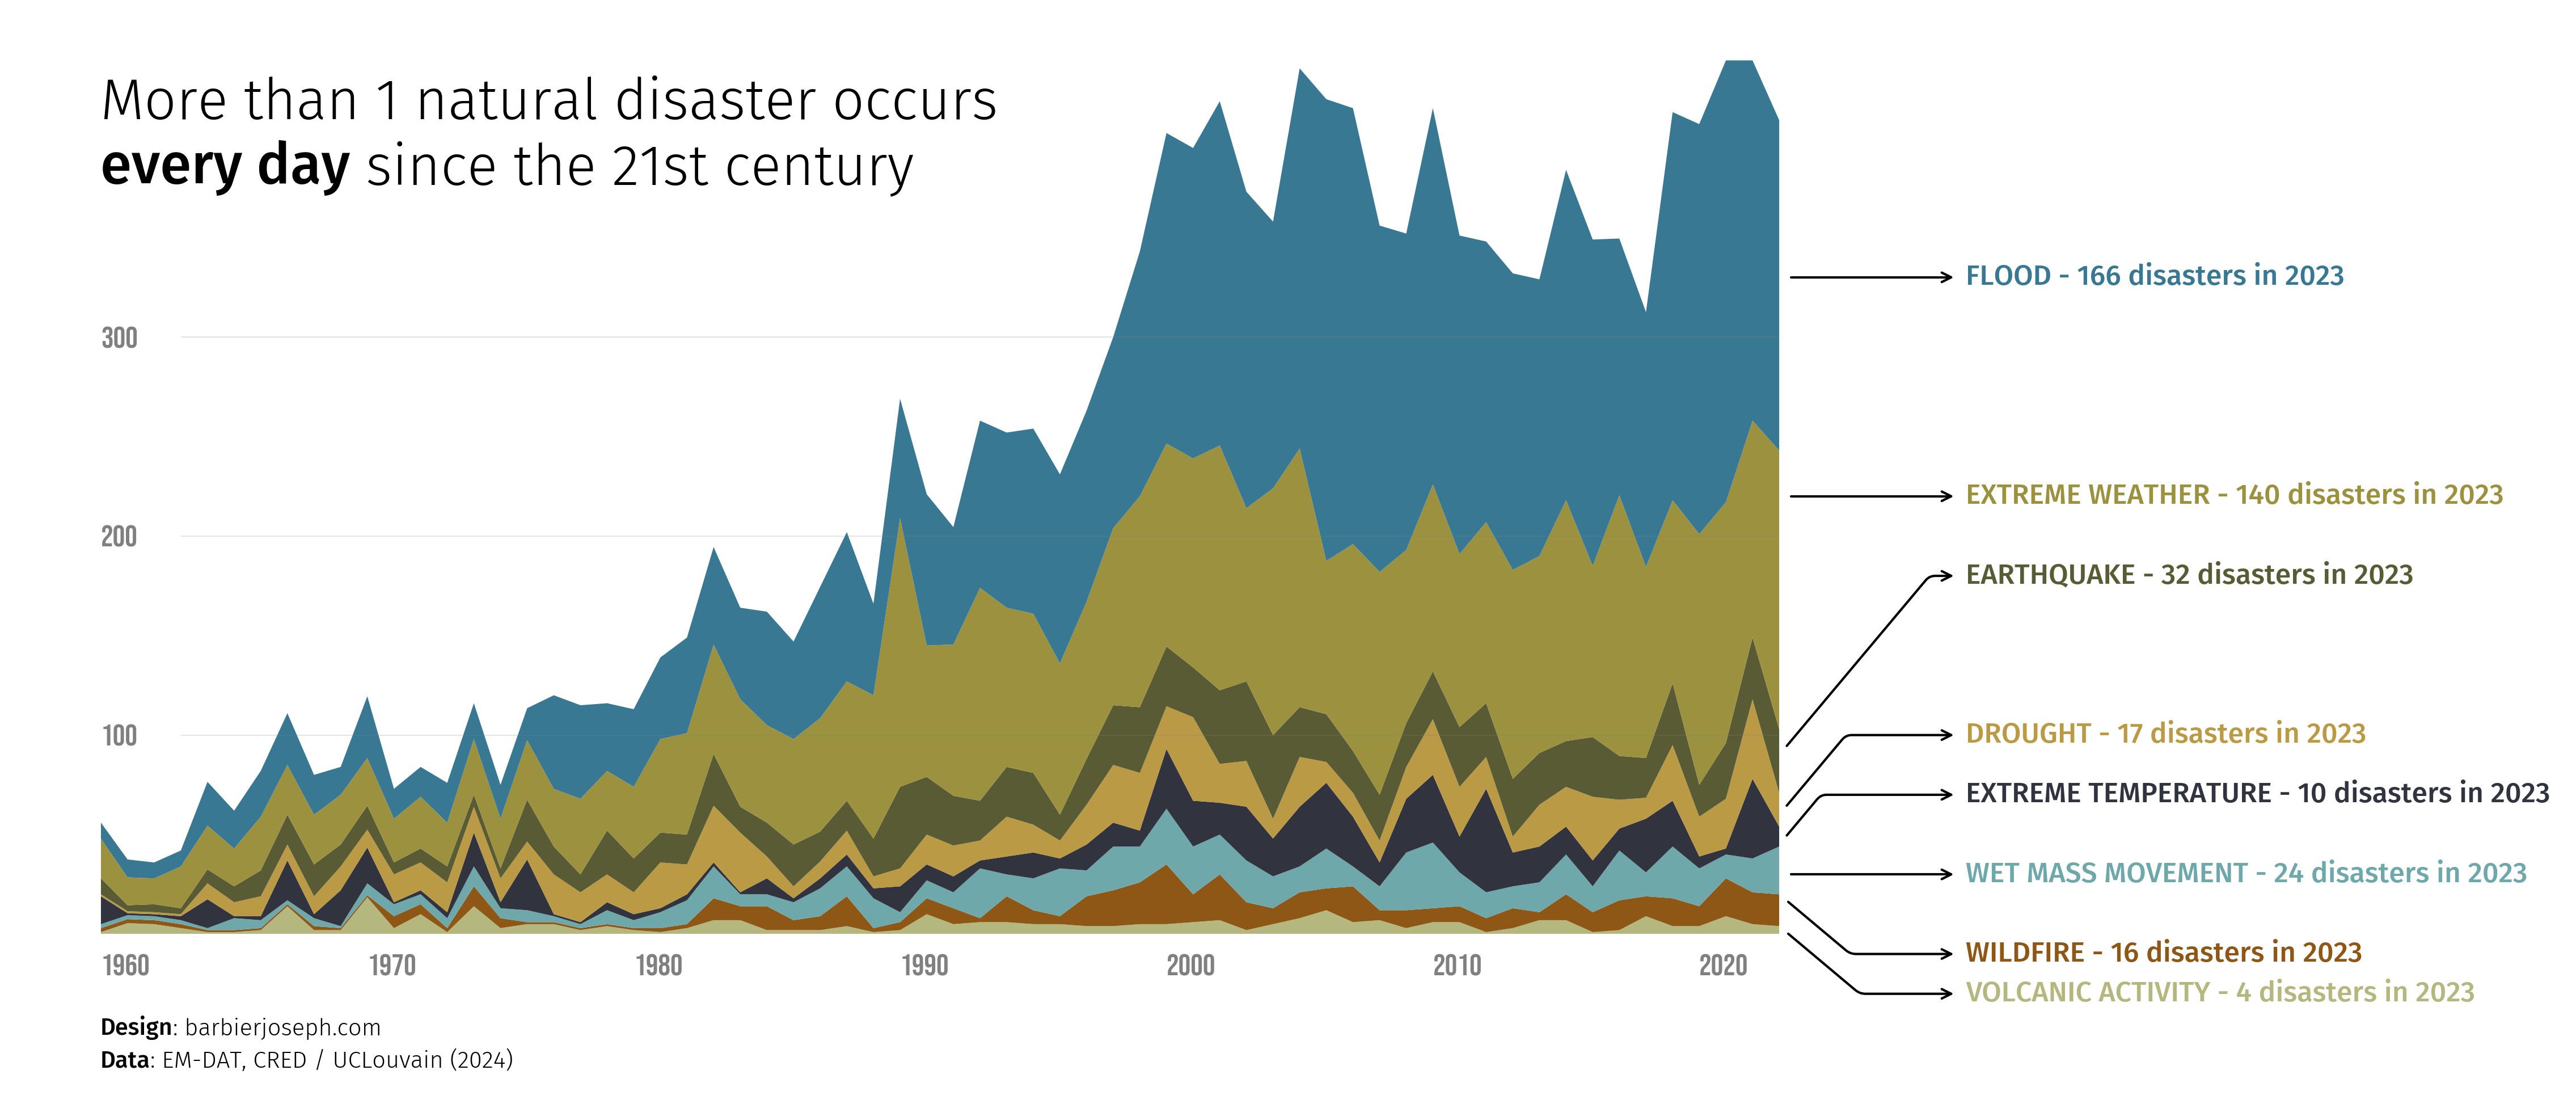

In [21]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )
   ax.plot([1963, 2023], [value, value], color='grey', lw=.1)

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24,
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)

# add inline labels
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
   country = columns[::-1][i]
   val_2023 = int(df.loc[2023, country])
   ax_text(
      x=2030, y=y_pos[i], s=f"{country.upper()} - {val_2023} disasters in 2023",
      va='center', ha='left',
      font=other_bold_font, fontsize=12,
      color=colors[7-i]
   )

# add inflexion arrows
x_axis_start = 2023
x_axis_end = 2030
radius = 10
arrow_inflexion(ax, end=(x_axis_end, 330), start=(x_axis_start, 330), angleA=180 ,angleB=90, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 220), start=(x_axis_start, 220), angleA=180 ,angleB=90, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 180), start=(x_axis_start, 90), angleA=50, angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 100), start=(x_axis_start, 60), angleA=50, angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 70), start=(x_axis_start, 45), angleA=50, angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 30), start=(x_axis_start, 30), angleA=180 ,angleB=90, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, -10), start=(x_axis_start, 20), angleA=140 ,angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, -30), start=(x_axis_start, 4), angleA=140 ,angleB=180, radius=radius)

plt.savefig('../../static/graph/web-stacked-area-with-inflexion-arrows.png', bbox_inches='tight', dpi=300)
plt.show()

## Going further

You might be interested in:

- the [stacked area chart section](/stacked-area-plot) of the gallery
- how to create [arrow with an inflexion point](/591-arrows-with-inflexion-point) in a plot
- how to use [the highlight_text package](/advanced-custom-annotations-matplotlib) to add annotations to a plot
- how to create [beaufitul streamgraphs](/web-streamchart-with-matplotlib)
- this [small multiple line chart](/web-small-multiple-with-highlights)
